# task : given a name, identify its natioanlity
RNN, LSTM, GRU

In [ ]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from IPython.display import clear_output

In [ ]:
languages = []
data = []
X = []
Y = []

with open('name2lang.txt', 'r') as f:
  for line in f:
    line = line.split(',')
    name = line[0].strip()
    lang = line[1].strip()
    if not lang in languages:
      languages.append(lang)
    X.append(name)
    Y.append(lang)
    data.append((name,lang))
  
n_languages = len(languages)

In [ ]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify=Y)

#Encoding names and languages

In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letter = len(all_letters)

In [ ]:
def name_rep(name):
  rep = torch.zeros(len(name), 1, n_letter)
  for index, letter in enumerate(name):
    pos = all_letters.find(letter)
    rep[index][0][pos] = 1
  return rep

In [ ]:
def lang_rep(lang):
  return torch.tensor([languages.index(lang)], dtype=torch.long)

In [ ]:
name_rep('abreu')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
count = {}
for l in languages:
  count[l] = 0
for d in data:
  count[d[1]] += 1

In [ ]:
count

{'Arabic': 2000,
 'Chinese': 268,
 'Czech': 519,
 'Dutch': 297,
 'English': 3668,
 'French': 277,
 'German': 724,
 'Greek': 203,
 'Irish': 232,
 'Italian': 709,
 'Japanese': 991,
 'Korean': 94,
 'Polish': 139,
 'Portuguese': 74,
 'Russian': 9384,
 'Scottish': 100,
 'Spanish': 298,
 'Vietnamese': 73}

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


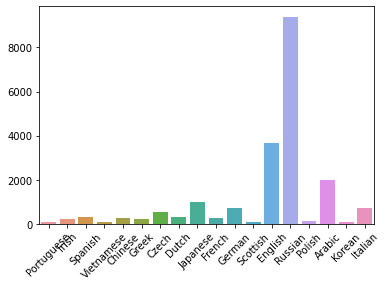

In [ ]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation = 45)
plt.show()

In [ ]:
class RNN_net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_net, self).__init__()
    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim = 1)
  
  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden
  
  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
net = RNN_net(n_letter, n_hidden, n_languages)

In [ ]:
def infer(net, name):
  net.eval()
  name_ohe = name_rep(name)
  hidden = net.init_hidden()

  for i in range(name_ohe.size()[0]):
    output, hidden = net(name_ohe[i], hidden)
  return output

In [ ]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-2.8395, -2.9601, -2.8363, -2.9950, -2.7450, -2.8924, -2.9429, -2.9834,
         -2.8052, -2.8499, -2.9127, -2.8810, -2.8691, -2.8978, -2.8926, -2.9492,
         -2.8646, -2.9458]], grad_fn=<LogSoftmaxBackward>) tensor(4)


In [ ]:
def dataloader(npoints, X_, y_):
  to_ret = []
  for i in range(npoints):
    index_ = np.random.randint(len(X_))
    name, lang = X_[index_], y_[index_]
    to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
  return to_ret

In [ ]:
def eval(net, n_points, k, X_, y_):
  data_ = dataloader(n_points, X_, y_)
  correct = 0
  for name, language, name_ohe, lang_rep in data_:
    output = infer(net, name)
    val, indices = output.topk(k)

    if lang_rep in indices:
      correct += 1
    
    accuracy = correct / n_points
    return accuracy

In [ ]:
eval(net, 1000, 10, X_test, y_test)

0.0

In [ ]:
def train(net, opt, critarion, n_points):
  opt.zero_grad()
  total_loss = 0
  data_ = dataloader(n_points, X_train, y_train)
  for name, language, name_ohe, lang_rep in data_:
    hidden = net.init_hidden()
    for i in range(name_ohe.size()[0]):
      output, hidden = net(name_ohe[i], hidden)
    loss = criterion(output, lang_rep)
    loss.backward(retain_graph=True)

    total_loss += loss
  
  opt.step()
  return total_loss/n_points


In [ ]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

In [ ]:
train(net, opt, criterion, 200)

tensor(nan, grad_fn=<DivBackward0>)

In [ ]:
eval(net, 100, 10, X_test, y_test)

0.01

In [ ]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    
    loss_arr = np.zeros(n_batches + 1)
    
    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i + 1)
        
        if i%display_freq == display_freq-1:
            clear_output(wait=True)
            
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')

Iteration 99 Top-1: 0.0 Top-2: 0.0 Loss 1.4648634195327759


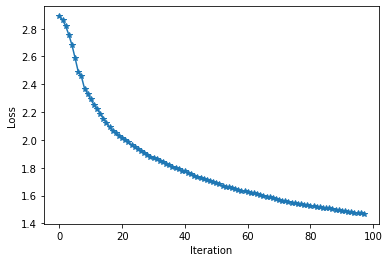

In [ ]:
n_hidden = 128
net = RNN_net(n_letter, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

In [ ]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

Iteration 99 Top-1: 0.00024937655860349125 Top-2: 0.00024937655860349125 Loss 1.7971559762954712


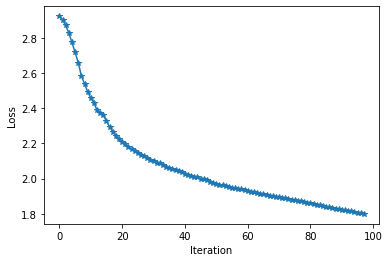

In [ ]:
n_hidden = 128
net = LSTM_net(n_letter, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

In [ ]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
        out, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

Iteration 99 Top-1: 0.0 Top-2: 0.0 Loss 1.6550981998443604


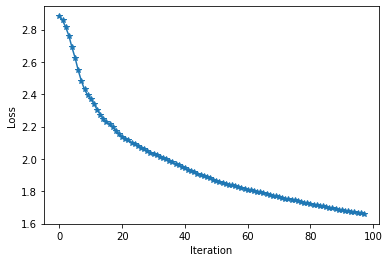

In [ ]:
n_hidden = 128
net = GRU_net(n_letter, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)